Successfully read: ../Data/FitBit/Active Zone Minutes (AZM)/Active Zone Minutes - 2024-07-12.csv
Successfully read: ../Data/FitBit/Active Zone Minutes (AZM)/Active Zone Minutes - 2024-08-01.csv
Successfully read: ../Data/FitBit/Active Zone Minutes (AZM)/Active Zone Minutes - 2024-09-01.csv
Successfully read: ../Data/FitBit/Active Zone Minutes (AZM)/Active Zone Minutes - 2024-10-01.csv
Successfully read: ../Data/FitBit/Active Zone Minutes (AZM)/Active Zone Minutes - 2024-11-01.csv
Successfully read: ../Data/FitBit/Active Zone Minutes (AZM)/Active Zone Minutes - 2024-12-01.csv


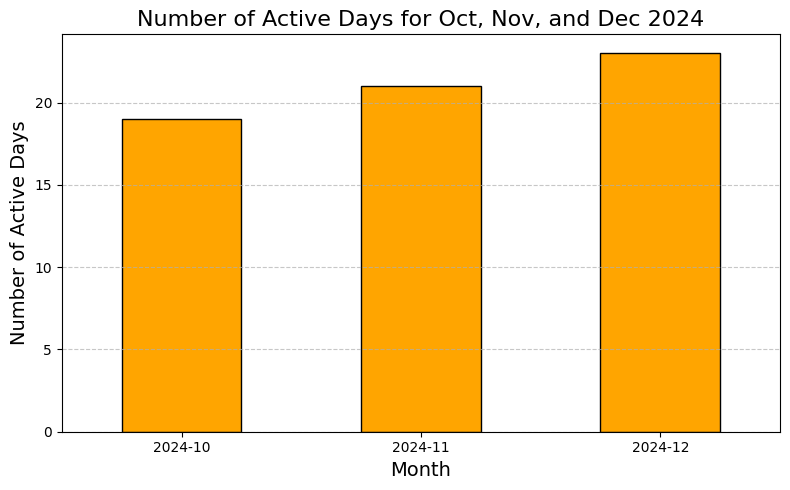

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Combine all the CSV files into a single DataFrame
file_paths = [
    "../Data/FitBit/Active Zone Minutes (AZM)/Active Zone Minutes - 2024-07-12.csv",
    "../Data/FitBit/Active Zone Minutes (AZM)/Active Zone Minutes - 2024-08-01.csv",
    "../Data/FitBit/Active Zone Minutes (AZM)/Active Zone Minutes - 2024-09-01.csv",
    "../Data/FitBit/Active Zone Minutes (AZM)/Active Zone Minutes - 2024-10-01.csv",
    "../Data/FitBit/Active Zone Minutes (AZM)/Active Zone Minutes - 2024-11-01.csv",
    "../Data/FitBit/Active Zone Minutes (AZM)/Active Zone Minutes - 2024-12-01.csv"
]

# Read and concatenate data from all files
dataframes = []
for file_path in file_paths:
    try:
        df = pd.read_csv(file_path)
        dataframes.append(df)
        print(f"Successfully read: {file_path}")
    except FileNotFoundError:
        print(f"File not found: {file_path}")
    except Exception as e:
        print(f"Error reading {file_path}: {e}")

# Combine data if no errors occurred
if dataframes:
    combined_data = pd.concat(dataframes, ignore_index=True)

    # Convert date_time to datetime format
    combined_data['date_time'] = pd.to_datetime(combined_data['date_time'])

    # Extract year-month and day
    combined_data['year_month'] = combined_data['date_time'].dt.to_period('M')
    combined_data['day'] = combined_data['date_time'].dt.to_period('D')

    # Count unique active days per month
    active_days_per_month = combined_data.groupby('year_month')['day'].nunique()

    # Filter for October, November, and December
    filtered_data = active_days_per_month[active_days_per_month.index.isin([
        pd.Period('2024-10'),
        pd.Period('2024-11'),
        pd.Period('2024-12')
    ])]

    # Plot the filtered data
    plt.figure(figsize=(8, 5))
    filtered_data.plot(kind='bar', color='orange', edgecolor='black')
    plt.title('Number of Active Days for Oct, Nov, and Dec 2024', fontsize=16)
    plt.xlabel('Month', fontsize=14)
    plt.ylabel('Number of Active Days', fontsize=14)
    plt.xticks(rotation=0)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
else:
    print("No data to process.")


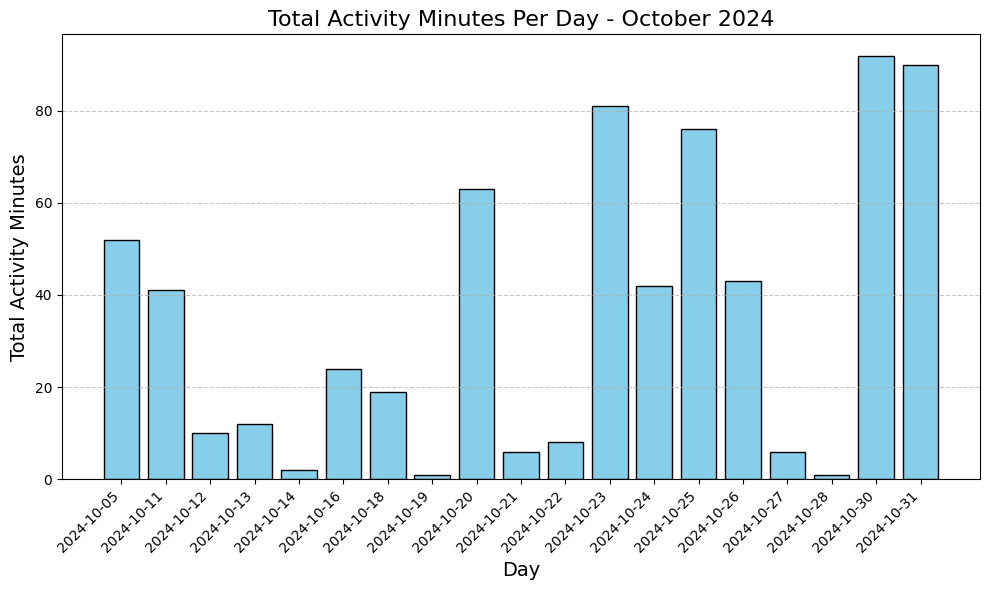

In [18]:
# Calculate total activity minutes per day for each month
total_minutes_per_day = combined_data.groupby(['year_month', combined_data['date_time'].dt.to_period('D')])['total_minutes'].sum().reset_index()

# Separate data for October, November, and December
october_data = total_minutes_per_day[total_minutes_per_day['year_month'] == pd.Period('2024-10')]
november_data = total_minutes_per_day[total_minutes_per_day['year_month'] == pd.Period('2024-11')]
december_data = total_minutes_per_day[total_minutes_per_day['year_month'] == pd.Period('2024-12')]

# Plot for October
plt.figure(figsize=(10, 6))
plt.bar(october_data['date_time'].dt.strftime('%Y-%m-%d'), october_data['total_minutes'], color='skyblue', edgecolor='black')
plt.title('Total Activity Minutes Per Day - October 2024', fontsize=16)
plt.xlabel('Day', fontsize=14)
plt.ylabel('Total Activity Minutes', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


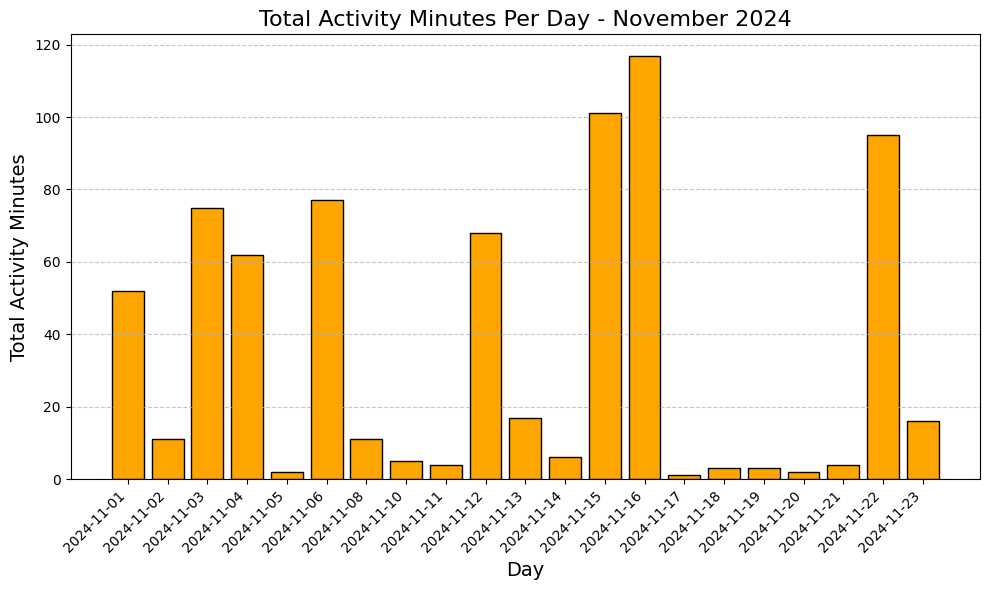

In [19]:
# Plot for November
plt.figure(figsize=(10, 6))
plt.bar(november_data['date_time'].dt.strftime('%Y-%m-%d'), november_data['total_minutes'], color='orange', edgecolor='black')
plt.title('Total Activity Minutes Per Day - November 2024', fontsize=16)
plt.xlabel('Day', fontsize=14)
plt.ylabel('Total Activity Minutes', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


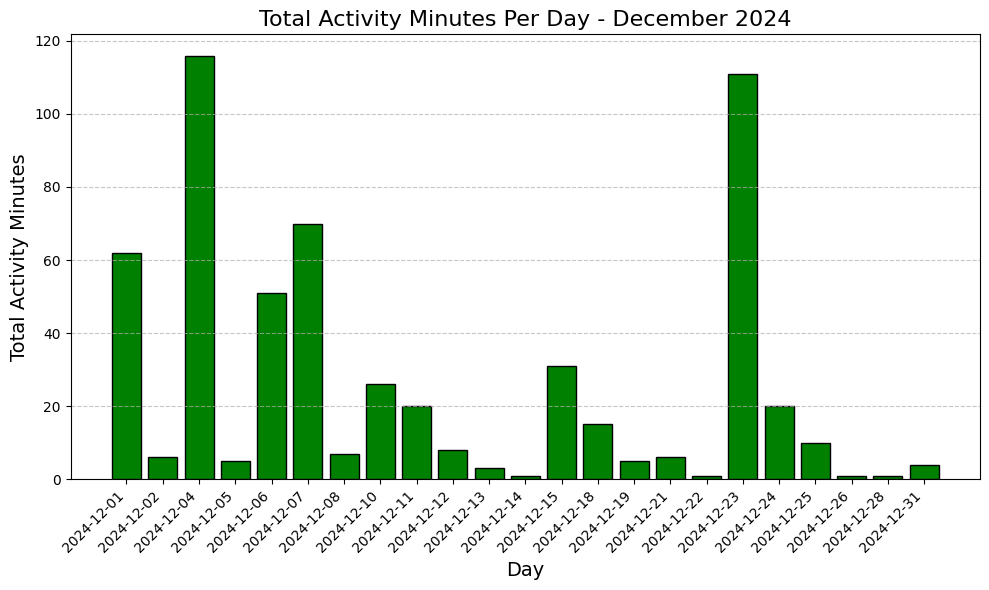

In [20]:
# Plot for December
plt.figure(figsize=(10, 6))
plt.bar(december_data['date_time'].dt.strftime('%Y-%m-%d'), december_data['total_minutes'], color='green', edgecolor='black')
plt.title('Total Activity Minutes Per Day - December 2024', fontsize=16)
plt.xlabel('Day', fontsize=14)
plt.ylabel('Total Activity Minutes', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()